In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
iris_data = pd.DataFrame(iris.data)

In [4]:
iris_data.columns = iris.feature_names

In [5]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
x_scaled = scaler.fit_transform(iris_data)

In [8]:
x_scaled.shape

(150, 4)

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

In [10]:
pca_scaled = pca.fit_transform(x_scaled)

In [11]:
pca_scaled

array([[-2.26470281,  0.4800266 ,  0.12770602],
       [-2.08096115, -0.67413356,  0.23460885],
       [-2.36422905, -0.34190802, -0.04420148],
       [-2.29938422, -0.59739451, -0.09129011],
       [-2.38984217,  0.64683538, -0.0157382 ],
       [-2.07563095,  1.48917752, -0.02696829],
       [-2.44402884,  0.0476442 , -0.3354704 ],
       [-2.23284716,  0.22314807,  0.0886955 ],
       [-2.33464048, -1.11532768, -0.14507686],
       [-2.18432817, -0.46901356,  0.25376557],
       [-2.1663101 ,  1.04369065,  0.2686811 ],
       [-2.32613087,  0.13307834, -0.09375924],
       [-2.2184509 , -0.72867617,  0.23091124],
       [-2.6331007 , -0.96150673, -0.18079608],
       [-2.1987406 ,  1.86005711,  0.472901  ],
       [-2.26221453,  2.68628449, -0.03052661],
       [-2.2075877 ,  1.48360936,  0.00534409],
       [-2.19034951,  0.48883832,  0.04421532],
       [-1.898572  ,  1.40501879,  0.37434327],
       [-2.34336905,  1.12784938, -0.13263047],
       [-1.914323  ,  0.40885571,  0.421

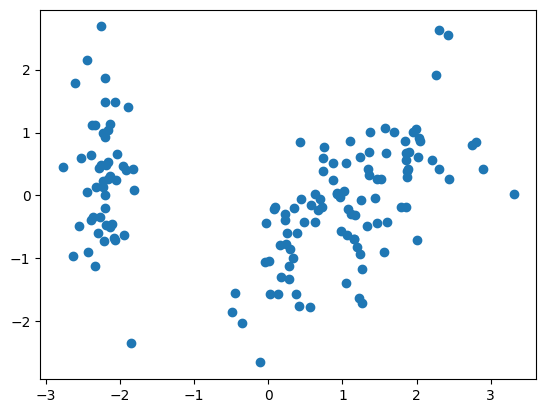

In [12]:
plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1])

Text(0, 0.5, 'Eucledian Distance')

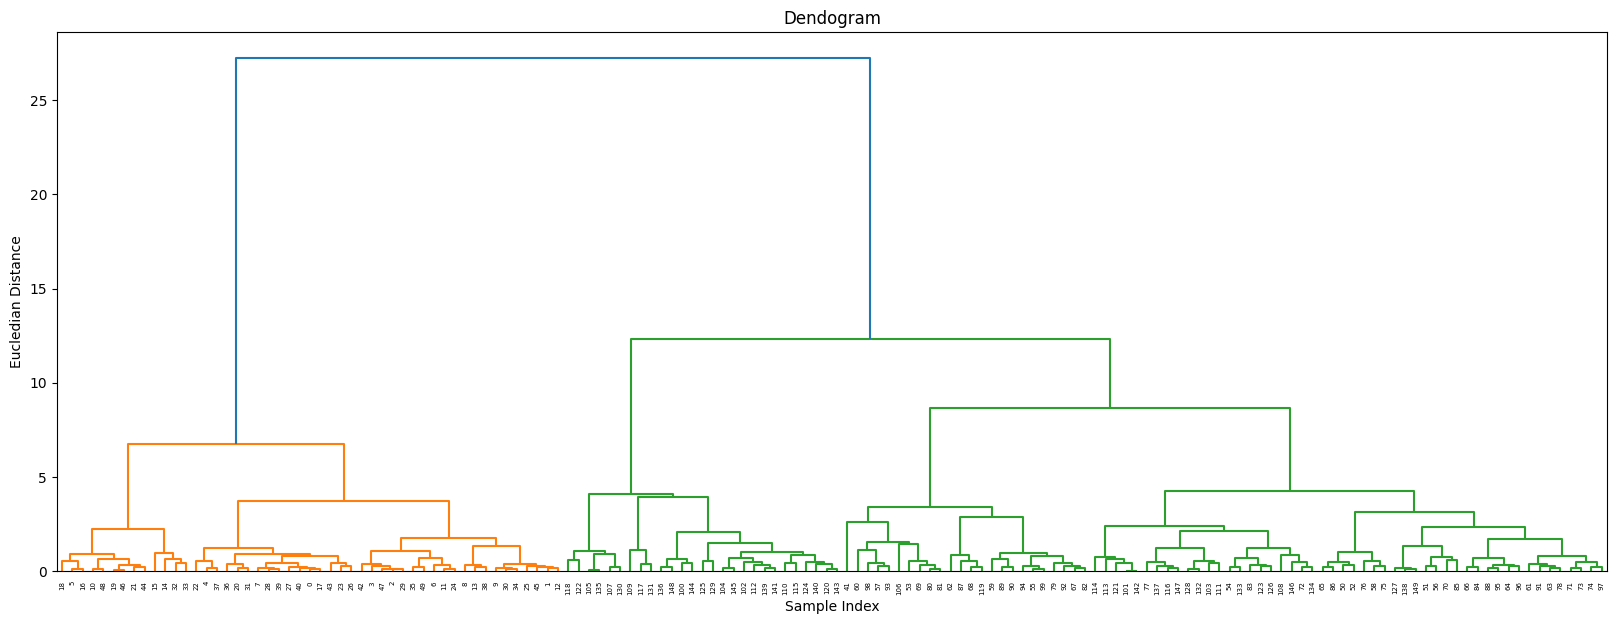

In [13]:
import scipy.cluster.hierarchy as sc
plt.figure(figsize=(20, 7))
plt.title("Dendograms")
sc.dendrogram(sc.linkage(pca_scaled, method="ward"))

plt.title("Dendogram")
plt.xlabel("Sample Index")
plt.ylabel("Eucledian Distance")

In [14]:
from sklearn.cluster import AgglomerativeClustering

# Use 'metric' instead of 'affinity' and 'ward' linkage automatically uses 'euclidean' distance
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
cluster.fit(pca_scaled)


AgglomerativeClustering()

In [15]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

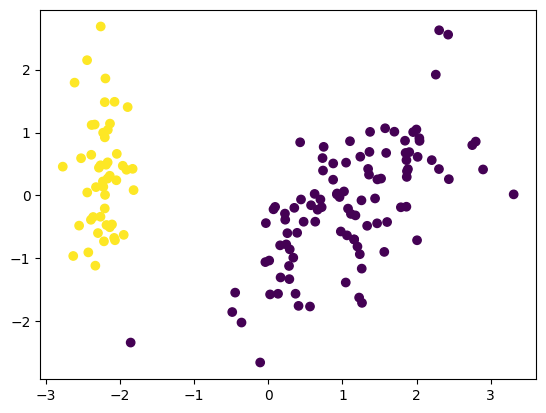

In [16]:
plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1], c=cluster.labels_)